# HOW TO PREDICT AN EMPLOYEE'S RESIGNATION ?

Nowadays, many companies have to deal with attrition. It is possible to find on Internet the following definition for this concept :

"The unpredictable and uncontrollable, but normal, reduction of work force due to resignations, retirement, sickness, or death." (http://www.businessdictionary.com/definition/attrition.html)

But is it really unpredictable ? The famous data-science oriented website Kaggle provides us an useful dataset (unfortunately not available anymore) for HR Analytics. This dataset contains information (such as evaluation, wage level or department) about 15 000 employees. My goal is to anticipate the resignation of the best of them.

## Data preprocessing

In [1]:
import pandas
import pandas
import matplotlib.pyplot as plt
import numpy as np
import math
#import sklearn.cross_validation
#import sklearn.grid_search
import random
from sklearn.linear_model import LogisticRegression
import sklearn.feature_selection
import sklearn.ensemble
hr = pandas.read_csv("./HR_comma_sep.csv")
hr.info()
hr.head(n = 10)

C:\Users\trist\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
C:\Users\trist\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


#### Selection of the best employees

I want to keep only the best employees because an company does not need to retain the bad ones. Arbitrarily, a good employee is someone who satisfies ONE of the following conditions :
- His/her last evaluation is above average (70% is the mean for this variable in the whole dataset)
- He/she has been given a promotion recently (last 5 years)
- He/she is an hard-worker (works more than 200h/a month)

In [2]:
#The dataset with all "good" employees will be called hr_good

good = hr.apply ( lambda row : row["last_evaluation"] > 0.70 or row["average_montly_hours"] > 200 
                 or row["promotion_last_5years"] > 0, axis = 1 )
hr_good = hr[good]

print("We have", len(hr_good), "observations in the new dataset")
print(int(np.mean(hr_good.left)*100), "% of these employees left the company")


We have 10480 observations in the new dataset
19 % of these employees left the company


#### Train/test split

In [3]:
split = hr_good.apply ( lambda row : random.randint(0,10000), axis = 1 ) 
hr_good ["split"] = split

cond_test = hr_good.apply ( lambda row : row["split"] > 9850, axis = 1 ) #around 150 employees in the test dataset
cond_train = hr_good.apply( lambda row : row["split"] < 9851, axis = 1 )

test = hr_good [cond_test]
hr_good = hr_good[cond_train]

test = test.drop("split", axis = 1)
hr_good = hr_good.drop("split", axis = 1)
copie_hr = hr #just for safety
print("There are", len(test), "good employees in the test dataset.")

C:\Users\trist\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


There are 126 good employees in the test dataset.


Adding set.seed, train/test split sklearn

## Data Analysis

To be improved

In [4]:
left = hr_good [ hr_good.left > 0 ]
stay = hr_good [ hr_good.left < 1 ]
print("Summary of quantitative variables (only on employees who left the company)")
print("Theses employees are", len(left), ". That represents approximately", int(len(left)/len(hr_good)*100), "% of the train dataset")
pandas.DataFrame.describe(left)

Summary of quantitative variables (only on employees who left the company)
Theses employees are 1996 . That represents approximately 19 % of the train dataset


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.0,1996.000000
mean,0.461538,0.876728,5.228457,256.426353,4.518036,0.047094,1.0,0.008517
std,0.346278,0.102859,1.167184,32.582990,0.815990,0.211893,0.0,0.091917
min,0.090000,0.450000,2.000000,128.000000,2.000000,0.000000,1.0,0.000000
25%,0.100000,0.837500,4.000000,242.000000,4.000000,0.000000,1.0,0.000000
50%,0.470000,0.890000,5.000000,258.000000,5.000000,0.000000,1.0,0.000000
75%,0.810000,0.950000,6.000000,277.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [5]:
print("Summary of quantitative variables (only on employees who are still working for the company)")
print("Theses employees are", len(stay), ". That represents approximately", int(len(stay)/len(hr_good)*100),"% of the train dataset")
pandas.DataFrame.describe(stay)

Summary of quantitative variables (only on employees who are still working for the company)
Theses employees are 8358 . That represents approximately 80 % of the train dataset


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.0,8358.000000
mean,0.676935,0.766810,3.824599,212.940775,3.385738,0.173845,0.0,0.035296
std,0.215519,0.150844,0.963673,42.967271,1.566765,0.378999,0.0,0.184537
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.550000,0.660000,3.000000,181.000000,2.000000,0.000000,0.0,0.000000
50%,0.700000,0.780000,4.000000,219.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.890000,4.000000,248.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


First, let's compute the correlations between the quantitative variables

In [6]:
correlations= hr_good[["satisfaction_level","last_evaluation","number_project","average_montly_hours",
                       "time_spend_company","Work_accident","left","promotion_last_5years"]].corr()
correlations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,-0.034585,-0.408007,-0.211231,-0.146456,0.042622,-0.326290,0.012196
last_evaluation,-0.034585,1.000000,0.155742,-0.122373,0.097713,-0.040627,0.290467,-0.097513
number_project,-0.408007,0.155742,1.000000,0.282904,0.171987,-0.069436,0.482246,-0.051514
average_montly_hours,-0.211231,-0.122373,0.282904,1.000000,0.097360,-0.050146,0.384644,-0.082278
time_spend_company,-0.146456,0.097713,0.171987,0.097360,1.000000,-0.020934,0.293942,0.066381
Work_accident,0.042622,-0.040627,-0.069436,-0.050146,-0.020934,1.000000,-0.140257,0.044981
left,-0.326290,0.290467,0.482246,0.384644,0.293942,-0.140257,1.000000,-0.061792
promotion_last_5years,0.012196,-0.097513,-0.051514,-0.082278,0.066381,0.044981,-0.061792,1.000000


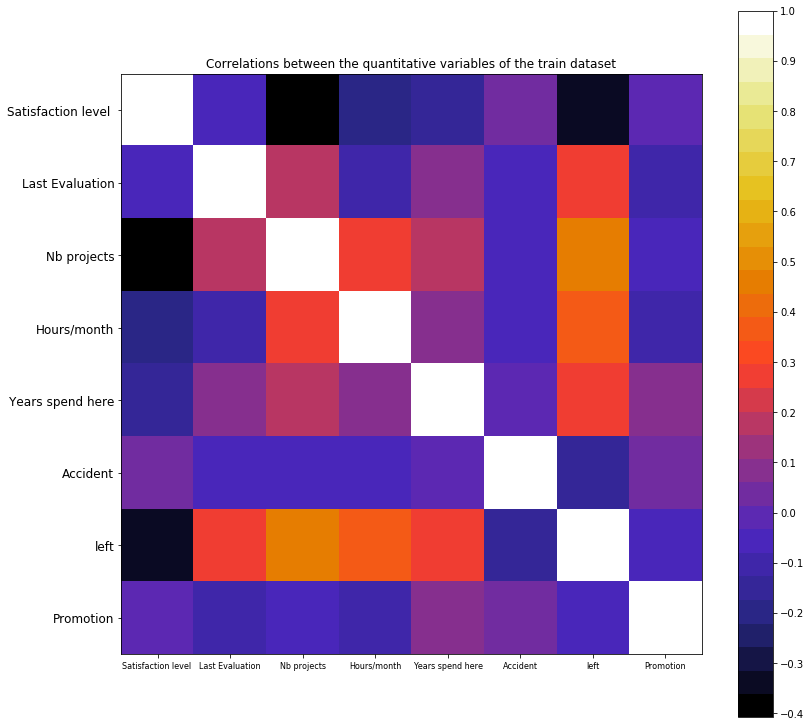

In [7]:
from matplotlib import cm
fig = plt.figure(figsize = (13,13))
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap("CMRmap", 30)
cax = ax1.imshow(correlations, interpolation="nearest", cmap=cmap)
plt.title("Correlations between the quantitative variables of the train dataset")
labels = ["X","Satisfaction level ", "Last Evaluation", "Nb projects", "Hours/month", "Years spend here",
          "Accident", "left", "Promotion"]
ax1.set_xticklabels(labels, fontsize = 8)
ax1.set_yticklabels(labels, fontsize = 12)
fig.colorbar(cax, ticks=[-0.90, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.70, 0.8, 0.90,1])
plt.show()

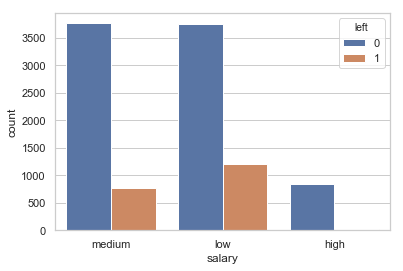

In [10]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.countplot(x="salary", hue = "left",  data=hr_good)

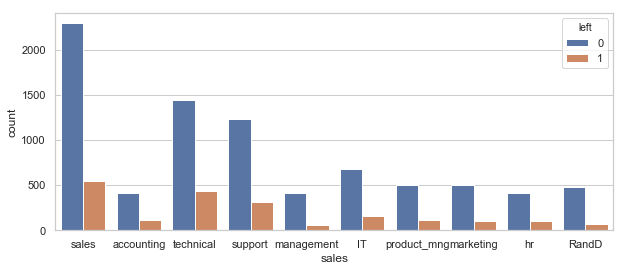

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,4))
ax = sns.countplot(x="sales", hue = "left",  data=hr_good)
plt.show()

### Observations about the dataset

- Imbalanced dataset (80% of the employees stayed)
- No missing values

In [ ]:
hr_good = pandas.DataFrame(hr_good)
copie_hr_good = hr_good
variables = ['sales','salary','Work_accident','left','promotion_last_5years']
for elt in variables :
    hr_good[elt] = hr_good[elt].astype('category')
    
hr_good = pandas.get_dummies(hr_good, drop_first = True)

# Logistic Regression